# Week 1: Setup + EDA

## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

## 2. Import Data

In [ ]:
dataset = pd.read_csv('heart_disease_uci.csv')

## 3. Data Quality Checks

### 3.0 Explore Data types

In [ ]:
dataset.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
dataset.shape

(920, 16)

In [ ]:
dataset.dtypes

,0
id,int64
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64


### 3.1 Missing Values

In [ ]:
missing_values = dataset.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

Columns with missing values:
 trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64


In [ ]:
dataset.dropna(subset=['restecg'], inplace=True) # since we have only two rows missing the 'restecg' variable, we'll drop them

#### Separate Numerical and Categorical Columns

Identify and separate the numerical and categorical columns that still contain missing values. This will allow us to apply different imputation strategies based on the column type.


In [ ]:
print("Unique values for 'fbs':", dataset['fbs'].unique())
print("Unique values for 'exang':", dataset['exang'].unique())
print("Unique values for 'slope':", dataset['slope'].unique())
print("Unique values for 'ca':", dataset['ca'].unique())

Unique values for 'fbs': [True False nan]
Unique values for 'exang': [False True nan]
Unique values for 'slope': ['downsloping' 'flat' 'upsloping' nan]
Unique values for 'ca': [ 0.  3.  2.  1. nan]


In [ ]:
missing_numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
missing_categorical_cols = ['fbs', 'exang', 'slope', 'ca', 'thal']

print("Numerical columns with missing values:", missing_numerical_cols)
print("Categorical columns with missing values:", missing_categorical_cols)

Numerical columns with missing values: ['trestbps', 'chol', 'thalch', 'oldpeak']
Categorical columns with missing values: ['fbs', 'exang', 'slope', 'ca', 'thal']


#### Analyze Numerical Skewness and Outliers

For each numerical column with missing values, we'll plot a histogram and a boxplot to visualize its distribution, skewness, and potential outliers. Calculate the skewness metric to quantify its distribution.


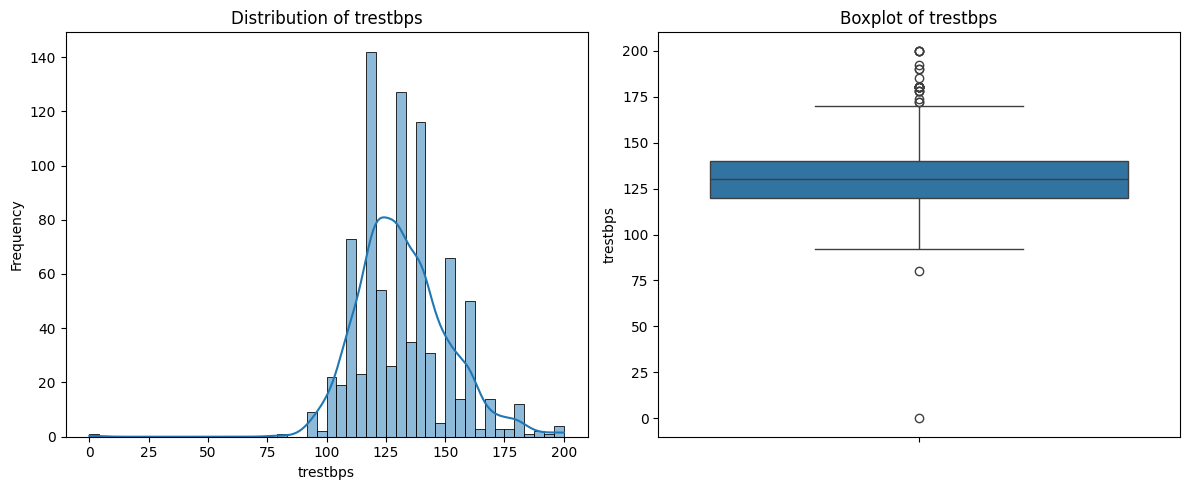

Skewness for 'trestbps': 0.2125

--------------------------------------------------



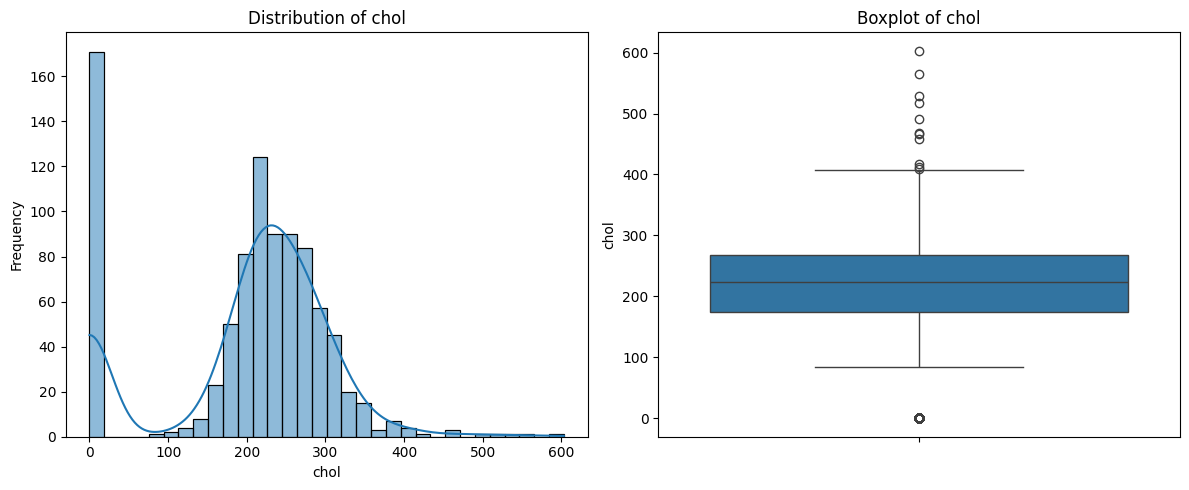

Skewness for 'chol': -0.6146

--------------------------------------------------



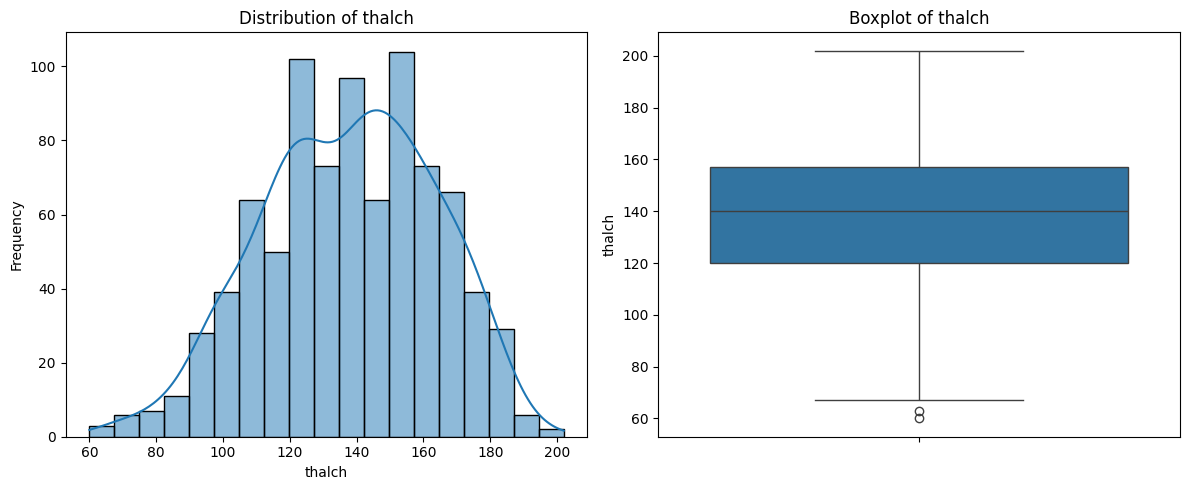

Skewness for 'thalch': -0.2093

--------------------------------------------------



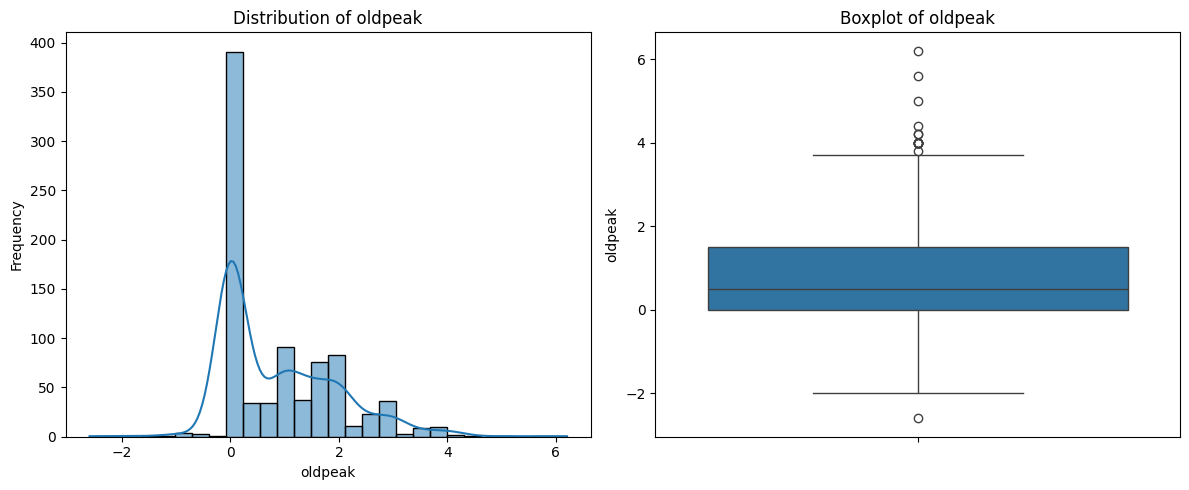

Skewness for 'oldpeak': 1.0380

--------------------------------------------------



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in missing_numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(dataset[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataset[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

    # Calculate skewness
    skewness_val = dataset[col].skew()
    print(f"Skewness for '{col}': {skewness_val:.4f}")
    print("\n" + "-"*50 + "\n")

#### Determine Optimal Imputation Strategy for Numerical Columns


Based on the analysis of skewness and outliers, decide whether to use 'mean' or 'median' imputation for each numerical column. For highly skewed distributions or those with significant outliers, 'median' is often preferred due to its robustness.


In [ ]:
numerical_imputation_strategies = {
    'trestbps': 'mean',  # Skewness 0.2125 (low skewness), use mean
    'chol': 'median',    # Skewness -0.6146 (moderate skewness), use median
    'thalch': 'mean',    # Skewness -0.2093 (low skewness), use mean
    'oldpeak': 'median'  # Skewness 1.0380 (high skewness), use median
}

print("Numerical Imputation Strategies:", numerical_imputation_strategies)

Numerical Imputation Strategies: {'trestbps': 'mean', 'chol': 'median', 'thalch': 'mean', 'oldpeak': 'median'}


In [ ]:
categorical_imputation_strategies = {col: 'most_frequent' for col in missing_categorical_cols}

print("Categorical Imputation Strategies:", categorical_imputation_strategies)

Categorical Imputation Strategies: {'fbs': 'most_frequent', 'exang': 'most_frequent', 'slope': 'most_frequent', 'ca': 'most_frequent', 'thal': 'most_frequent'}


In [ ]:
from sklearn.impute import SimpleImputer

# Apply imputation for numerical columns
for col, strategy in numerical_imputation_strategies.items():
    imputer = SimpleImputer(strategy=strategy)
    dataset[col] = imputer.fit_transform(dataset[[col]]).ravel()

# Apply imputation for categorical columns
for col, strategy in categorical_imputation_strategies.items():
    imputer = SimpleImputer(strategy=strategy)
    dataset[col] = imputer.fit_transform(dataset[[col]]).ravel()

print("Missing values after imputation:")
print(dataset.isnull().sum()[dataset.isnull().sum() > 0])

Missing values after imputation:
Series([], dtype: int64)


#### Summary:


All missing values in the dataset have been successfully handled using `sklearn` imputers.

The imputation strategies applied are:
*   **Numerical Features:**
    *   `trestbps`: Mean imputation (skewness 0.2125).
    *   `chol`: Median imputation (skewness -0.6146).
    *   `thalch`: Mean imputation (skewness -0.2093).
    *   `oldpeak`: Median imputation (skewness 1.0380).
*   **Categorical Features:**
    *   `fbs`, `exang`, `slope`, `ca`, `thal`: Most frequent imputation.

### Data Analysis Key Findings
*   Initially, nine columns (`trestbps`, `chol`, `fbs`, `thalch`, `exang`, `oldpeak`, `slope`, `ca`, `thal`) were identified with missing values.
*   These columns were categorized into four numerical (`trestbps`, `chol`, `thalch`, `oldpeak`) and five categorical (`fbs`, `exang`, `slope`, `ca`, `thal`) features.
* **Note:** 'ca' is numeric, but from the unique values [0., 1., 2., 3.] it appears to be an ordinal categorical variable representing the number of major vessels, also with missing values.
*   Numerical feature skewness analysis guided the imputation strategy: `trestbps` (0.2125) and `thalch` (-0.2093) were imputed with their respective means, while `chol` (-0.6146) and `oldpeak` (1.0380) were imputed with their respective medians due to moderate to high skewness.
*   All identified categorical features (`fbs`, `exang`, `slope`, `ca`, `thal`) were imputed using the 'most\_frequent' strategy.
*   Following the imputation, a verification confirmed that no missing values remained in the `dataset` DataFrame.



### 3.2 Duplicates

In [ ]:
dataset.duplicated().sum()

np.int64(0)

No duplicates found



### 3.3 Data Types Consistency

In [ ]:
# Check current data types
print("Current Data Types:")
print(dataset.dtypes)
print("\n" + "="*60 + "\n")

# Analyze unique values for columns that might need type conversion
print("Checking 'fbs' and 'exang' columns (should be boolean):")
print(f"fbs unique values: {dataset['fbs'].unique()}")
print(f"exang unique values: {dataset['exang'].unique()}")
print("\n" + "="*60 + "\n")

print("Checking 'ca' column (should be integer/categorical):")
print(f"ca unique values: {sorted(dataset['ca'].unique())}")
print("\n" + "="*60 + "\n")

# Convert data types for consistency
# Convert boolean columns
dataset['fbs'] = dataset['fbs'].astype(bool)
dataset['exang'] = dataset['exang'].astype(bool)

# Convert 'ca' to integer (number of major vessels)
dataset['ca'] = dataset['ca'].astype(int)

# Verify the changes
print("\nData Types After Conversion:")
print(dataset.dtypes)
print("\n" + "="*60 + "\n")

print("Verification of converted columns:")
print(f"fbs dtype: {dataset['fbs'].dtype}, unique values: {dataset['fbs'].unique()}")
print(f"exang dtype: {dataset['exang'].dtype}, unique values: {dataset['exang'].unique()}")
print(f"ca dtype: {dataset['ca'].dtype}, unique values: {sorted(dataset['ca'].unique())}")
print("\n✓ Data types are now consistent with domain knowledge")

Current Data Types:
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


Checking 'fbs' and 'exang' columns (should be boolean):
fbs unique values: [True False]
exang unique values: [False True]


Checking 'ca' column (should be integer/categorical):
ca unique values: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0)]



Data Types After Conversion:
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang          bool
oldpeak     float64
slope        object
ca            int64
thal         object
num           int64
dtype: object


Verificatio

### 3.4 Outliers (domain checks, IQR/z-score)

In [ ]:

# Define numerical columns for outlier analysis
numerical_cols_for_outliers = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

print("="*70)
print("OUTLIER DETECTION USING MULTIPLE METHODS")
print("="*70)

# 1. DOMAIN CHECKS (Medical/Clinical Ranges)
print("\n1. DOMAIN CHECKS - Validating against clinical ranges:\n")
print("-"*70)

domain_ranges = {
    'age': (0, 120),
    'trestbps': (80, 200),  # Resting blood pressure
    'chol': (100, 600),      # Serum cholesterol
    'thalch': (60, 220),     # Max heart rate achieved
    'oldpeak': (0, 10)       # ST depression
}

for col, (min_val, max_val) in domain_ranges.items():
    outliers = dataset[(dataset[col] < min_val) | (dataset[col] > max_val)]
    print(f"{col}: Valid range [{min_val}, {max_val}]")
    print(f"  - Values outside range: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  - Out of range values: Min={dataset[col].min():.2f}, Max={dataset[col].max():.2f}")
    print()

# 2. IQR METHOD
print("\n2. IQR (INTERQUARTILE RANGE) METHOD:\n")
print("-"*70)

iqr_outliers_summary = {}
for col in numerical_cols_for_outliers:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    iqr_outliers_summary[col] = len(outliers)

    print(f"{col}:")
    print(f"  - Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
    print(f"  - Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Outliers detected: {len(outliers)} ({len(outliers)/len(dataset)*100:.2f}%)")
    print()

# 3. Z-SCORE METHOD
print("\n3. Z-SCORE METHOD (threshold = 3):\n")
print("-"*70)

from scipy import stats

z_outliers_summary = {}
for col in numerical_cols_for_outliers:
    z_scores = np.abs(stats.zscore(dataset[col]))
    outliers = dataset[z_scores > 3]
    z_outliers_summary[col] = len(outliers)

    print(f"{col}:")
    print(f"  - Mean={dataset[col].mean():.2f}, Std={dataset[col].std():.2f}")
    print(f"  - Outliers detected (|z| > 3): {len(outliers)} ({len(outliers)/len(dataset)*100:.2f}%)")
    print()

# 4. SUMMARY AND DECISION
print("\n4. SUMMARY TABLE:\n")
print("-"*70)
import pandas as pd

summary_df = pd.DataFrame({
    'Feature': numerical_cols_for_outliers,
    'IQR_Outliers': [iqr_outliers_summary[col] for col in numerical_cols_for_outliers],
    'Z-Score_Outliers': [z_outliers_summary[col] for col in numerical_cols_for_outliers]
})
print(summary_df.to_string(index=False))

print("\n" + "="*70)
print("DECISION: Keep outliers for now")
print("="*70)
print("Rationale:")
print("  - Most outliers are within clinically valid ranges")
print("  - Outliers may represent important edge cases in cardiovascular health")
print("  - Will revisit after model performance evaluation")
print("  - Tree-based models (RF, XGBoost) are robust to outliers")
print("="*70)

OUTLIER DETECTION USING MULTIPLE METHODS

1. DOMAIN CHECKS - Validating against clinical ranges:

----------------------------------------------------------------------
age: Valid range [0, 120]
  - Values outside range: 0

trestbps: Valid range [80, 200]
  - Values outside range: 1
  - Out of range values: Min=0.00, Max=200.00

chol: Valid range [100, 600]
  - Values outside range: 173
  - Out of range values: Min=0.00, Max=603.00

thalch: Valid range [60, 220]
  - Values outside range: 0

oldpeak: Valid range [0, 10]
  - Values outside range: 12
  - Out of range values: Min=-2.60, Max=6.20


2. IQR (INTERQUARTILE RANGE) METHOD:

----------------------------------------------------------------------
age:
  - Q1=47.00, Q3=60.00, IQR=13.00
  - Bounds: [27.50, 79.50]
  - Outliers detected: 0 (0.00%)

trestbps:
  - Q1=120.00, Q3=140.00, IQR=20.00
  - Bounds: [90.00, 170.00]
  - Outliers detected: 28 (3.05%)

chol:
  - Q1=178.25, Q3=266.75, IQR=88.50
  - Bounds: [45.50, 399.50]
  - Outlier

## 4. Exploratory Data Analysis (EDA)

### 4.1 Univariate Distributions (histograms, KDE, boxplots)

UNIVARIATE DISTRIBUTION ANALYSIS

1. NUMERICAL FEATURES

----------------------------------------------------------------------


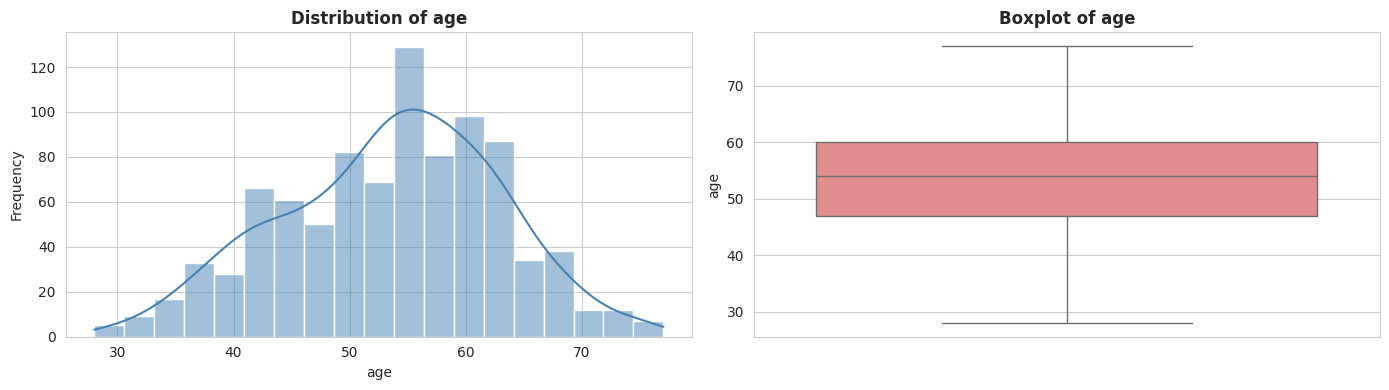


AGE - Summary Statistics:
  Mean: 53.53
  Median: 54.00
  Std Dev: 9.41
  Min: 28.00, Max: 77.00
  Skewness: -0.19
----------------------------------------------------------------------


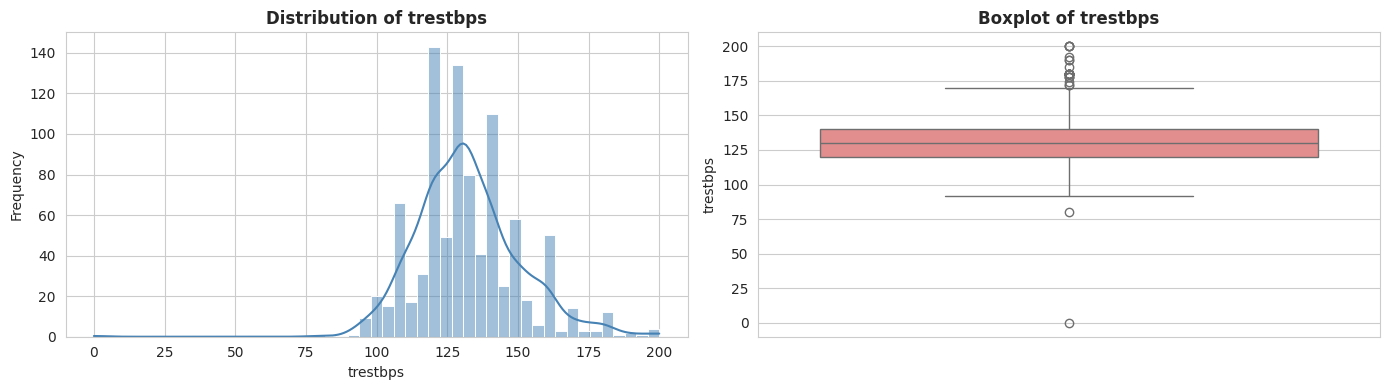


TRESTBPS - Summary Statistics:
  Mean: 132.14
  Median: 130.00
  Std Dev: 18.45
  Min: 0.00, Max: 200.00
  Skewness: 0.22
----------------------------------------------------------------------


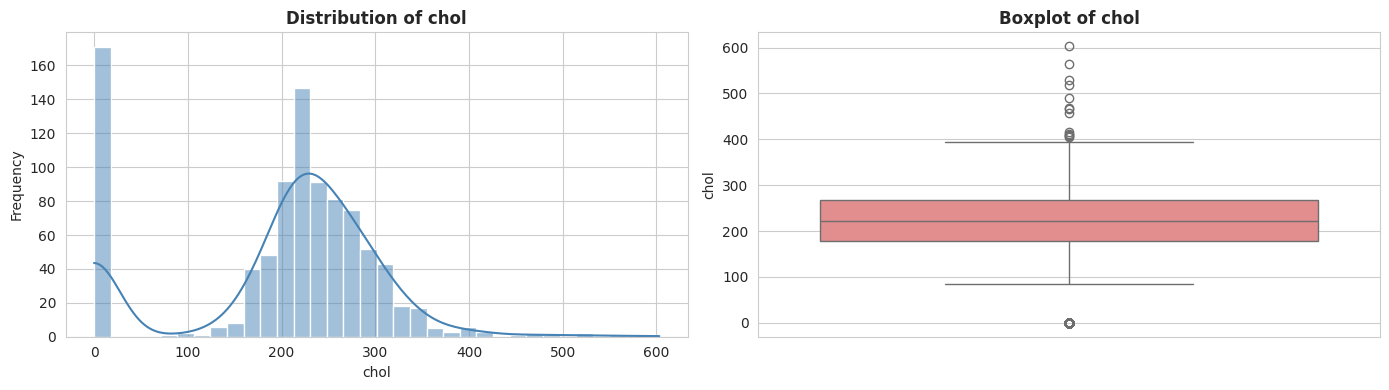


CHOL - Summary Statistics:
  Mean: 200.02
  Median: 223.00
  Std Dev: 108.91
  Min: 0.00, Max: 603.00
  Skewness: -0.64
----------------------------------------------------------------------


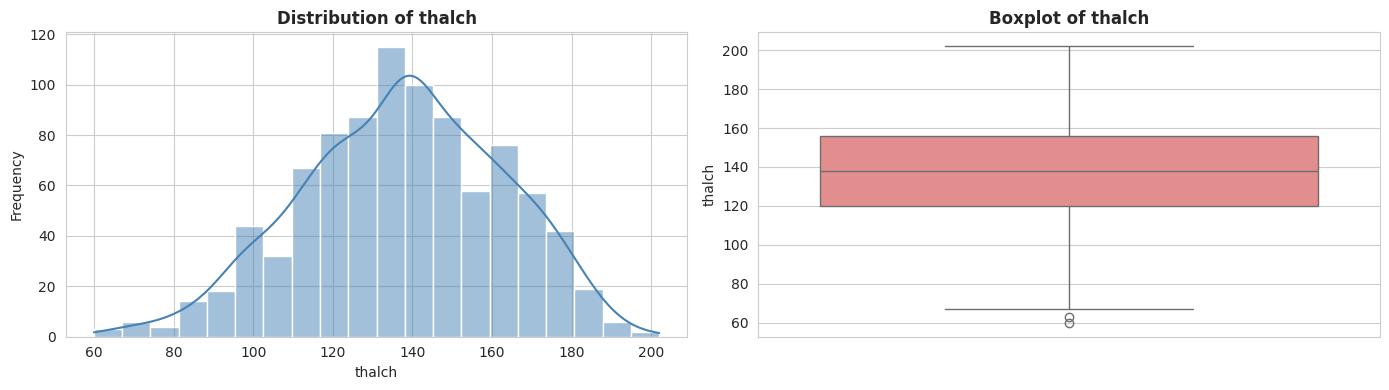


THALCH - Summary Statistics:
  Mean: 137.53
  Median: 138.00
  Std Dev: 25.16
  Min: 60.00, Max: 202.00
  Skewness: -0.22
----------------------------------------------------------------------


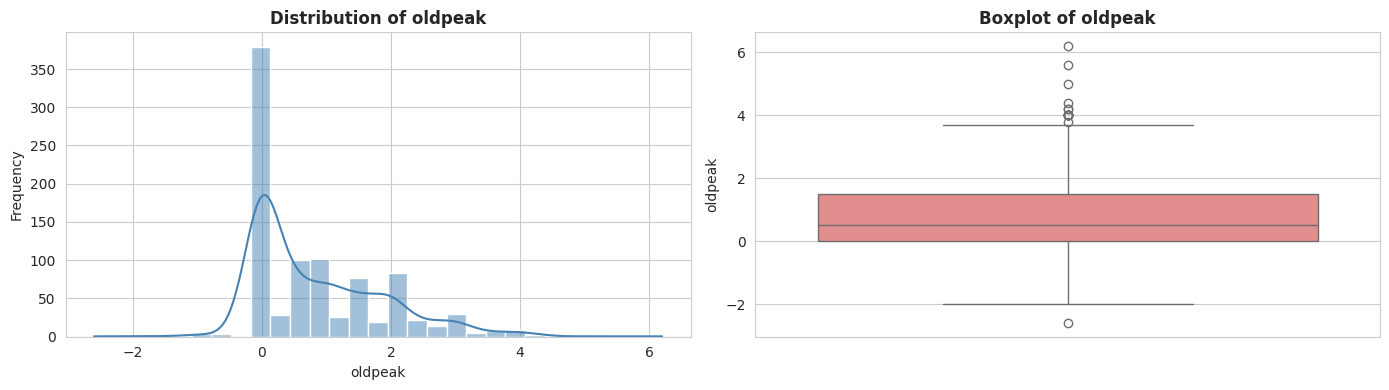


OLDPEAK - Summary Statistics:
  Mean: 0.85
  Median: 0.50
  Std Dev: 1.06
  Min: -2.60, Max: 6.20
  Skewness: 1.13
----------------------------------------------------------------------


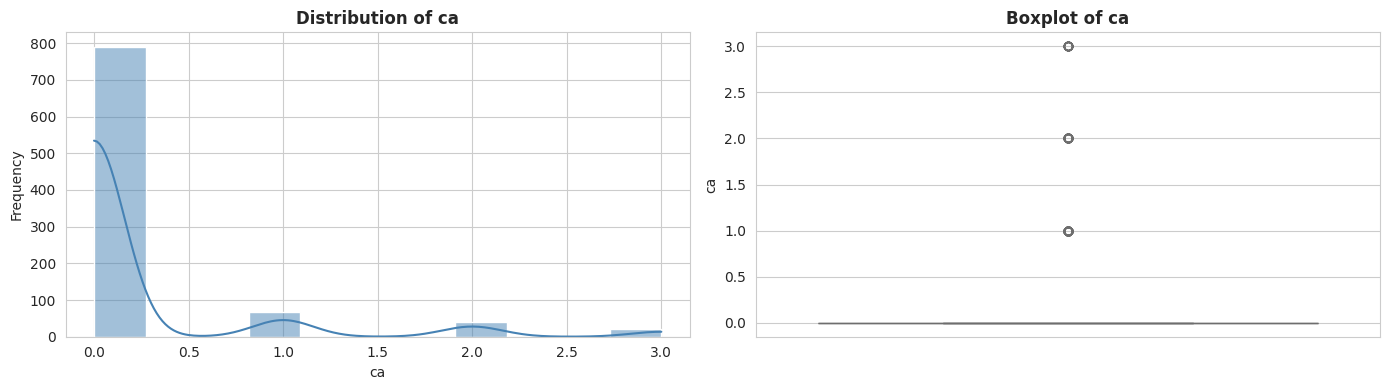


CA - Summary Statistics:
  Mean: 0.23
  Median: 0.00
  Std Dev: 0.63
  Min: 0.00, Max: 3.00
  Skewness: 2.96
----------------------------------------------------------------------


2. CATEGORICAL FEATURES

----------------------------------------------------------------------


/tmp/ipython-input-2166727764.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=value_counts.index, palette='Set2', ax=ax)


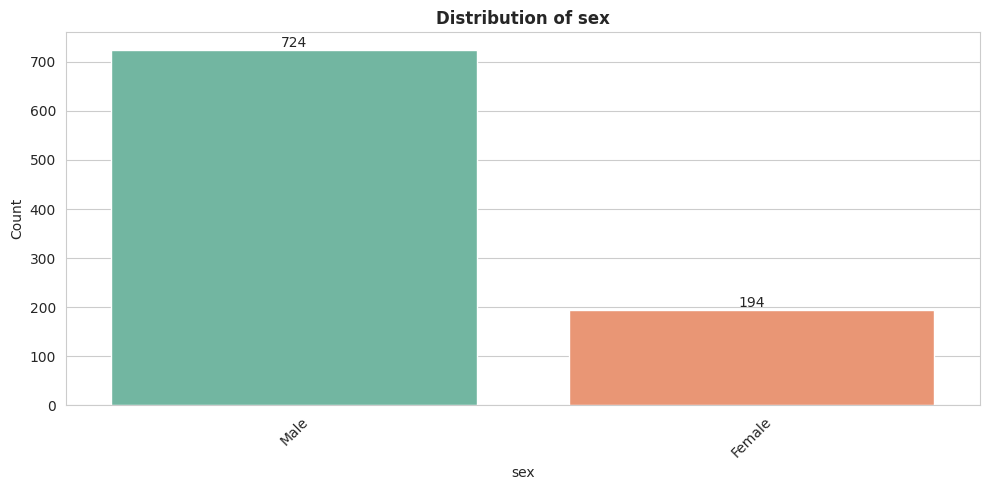


SEX - Value Counts:
sex
Male      724
Female    194
Name: count, dtype: int64
  Mode: Male
----------------------------------------------------------------------


/tmp/ipython-input-2166727764.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=value_counts.index, palette='Set2', ax=ax)


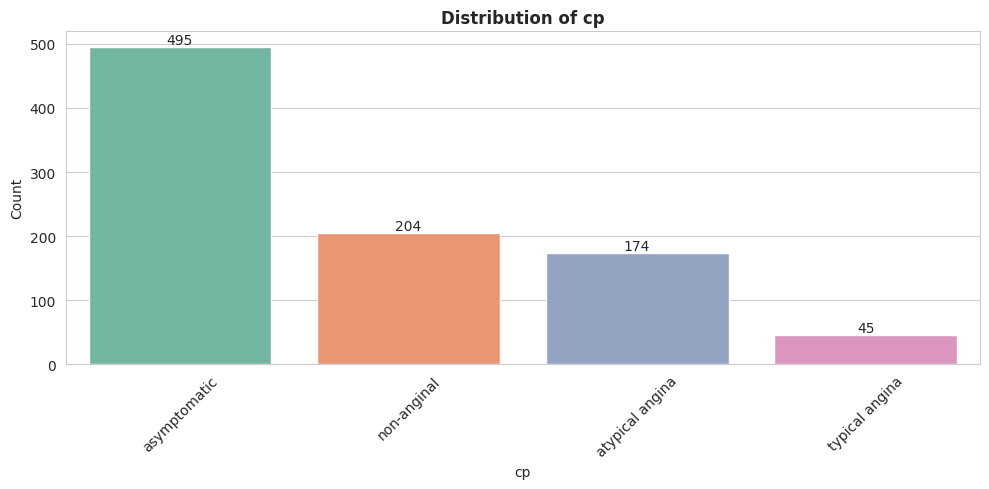


CP - Value Counts:
cp
asymptomatic       495
non-anginal        204
atypical angina    174
typical angina      45
Name: count, dtype: int64
  Mode: asymptomatic
----------------------------------------------------------------------


/tmp/ipython-input-2166727764.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=value_counts.index, palette='Set2', ax=ax)


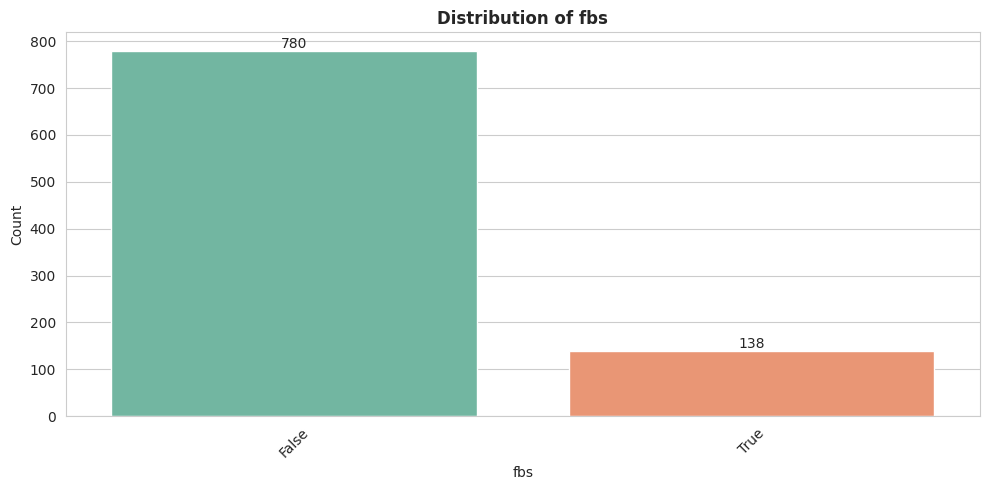


FBS - Value Counts:
fbs
False    780
True     138
Name: count, dtype: int64
  Mode: False
----------------------------------------------------------------------


/tmp/ipython-input-2166727764.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=value_counts.index, palette='Set2', ax=ax)


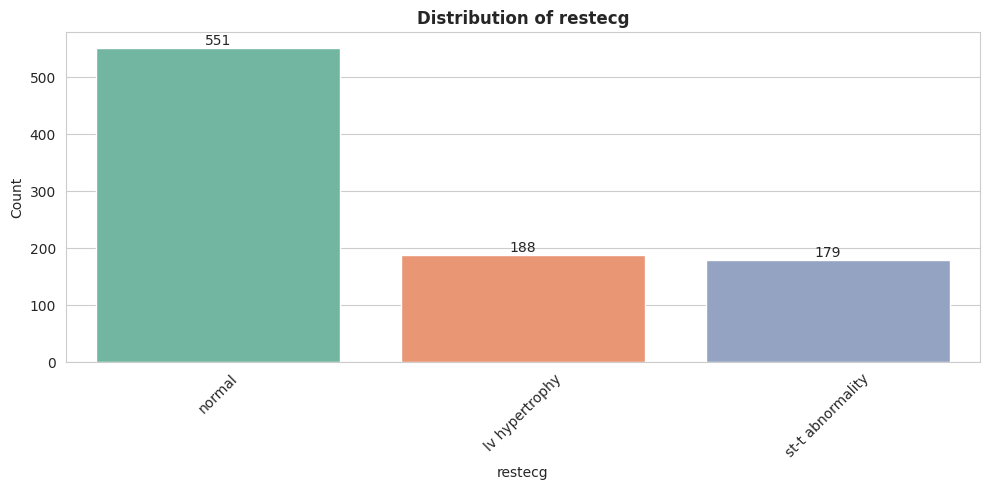


RESTECG - Value Counts:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
  Mode: normal
----------------------------------------------------------------------


/tmp/ipython-input-2166727764.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=value_counts.index, palette='Set2', ax=ax)


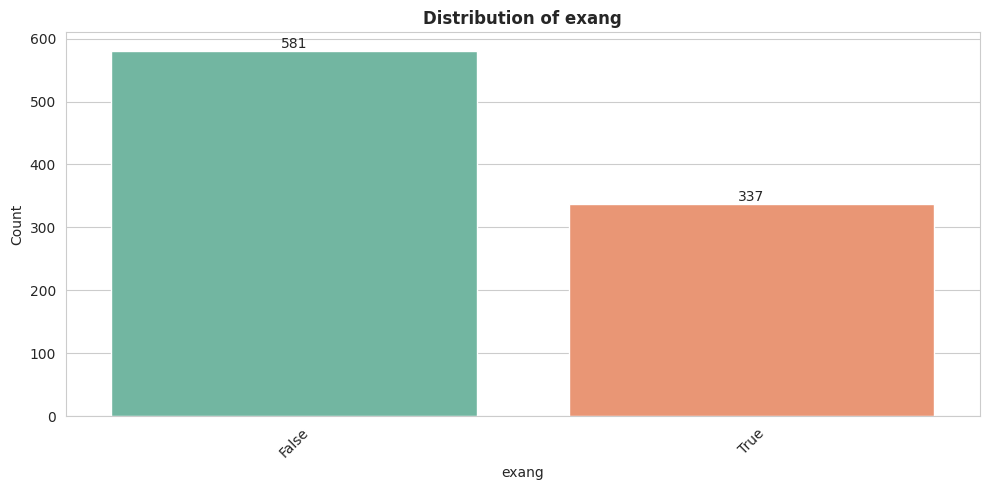


EXANG - Value Counts:
exang
False    581
True     337
Name: count, dtype: int64
  Mode: False
----------------------------------------------------------------------


/tmp/ipython-input-2166727764.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=value_counts.index, palette='Set2', ax=ax)


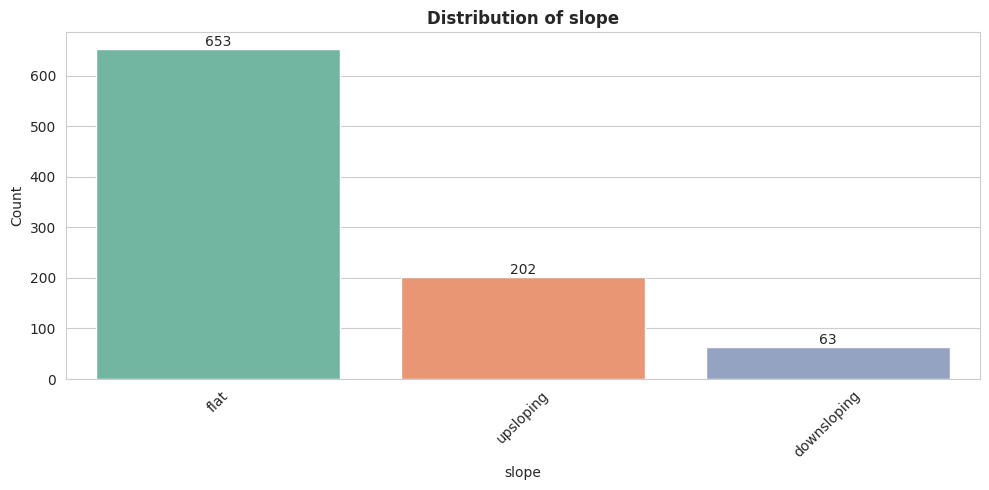


SLOPE - Value Counts:
slope
flat           653
upsloping      202
downsloping     63
Name: count, dtype: int64
  Mode: flat
----------------------------------------------------------------------


/tmp/ipython-input-2166727764.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=col, order=value_counts.index, palette='Set2', ax=ax)


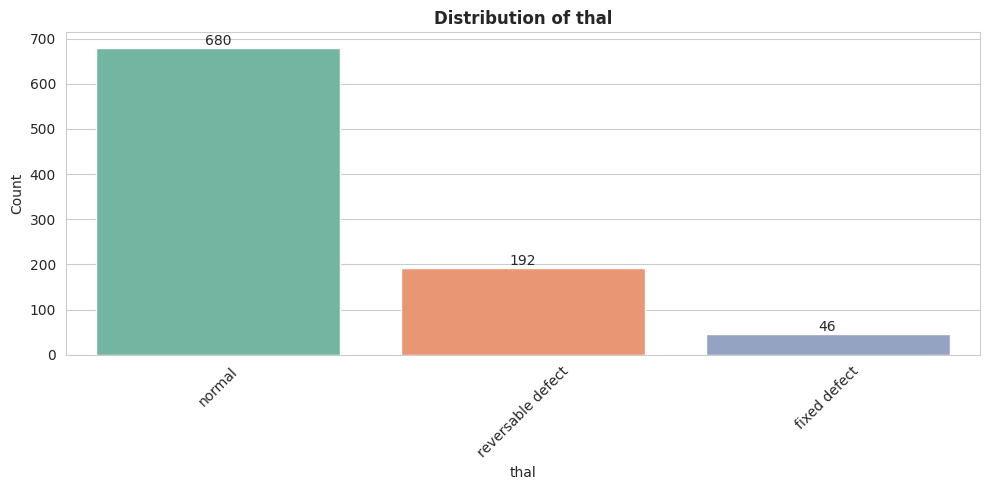


THAL - Value Counts:
thal
normal               680
reversable defect    192
fixed defect          46
Name: count, dtype: int64
  Mode: normal
----------------------------------------------------------------------

KEY INSIGHTS:
  - Age: Fairly normal distribution, range 29-77 years
  - Cholesterol and thalch show some outliers
  - Most categorical features have imbalanced distributions
  - Need to check target variable distribution next


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Define numerical and categorical columns
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

print("="*70)
print("UNIVARIATE DISTRIBUTION ANALYSIS")
print("="*70)

# Numerical Features: Histogram + KDE + Boxplot
print("\n1. NUMERICAL FEATURES\n")
print("-"*70)

for col in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Histogram with KDE
    sns.histplot(dataset[col], kde=True, ax=axes[0], color='steelblue')
    axes[0].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(y=dataset[col], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

    # Summary statistics
    print(f"\n{col.upper()} - Summary Statistics:")
    print(f"  Mean: {dataset[col].mean():.2f}")
    print(f"  Median: {dataset[col].median():.2f}")
    print(f"  Std Dev: {dataset[col].std():.2f}")
    print(f"  Min: {dataset[col].min():.2f}, Max: {dataset[col].max():.2f}")
    print(f"  Skewness: {dataset[col].skew():.2f}")
    print("-"*70)

# Categorical Features: Count plots
print("\n\n2. CATEGORICAL FEATURES\n")
print("-"*70)

for col in categorical_features:
    fig, ax = plt.subplots(figsize=(10, 5))

    # Count plot
    value_counts = dataset[col].value_counts()
    sns.countplot(data=dataset, x=col, order=value_counts.index, palette='Set2', ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)

    # Add count labels on bars
    for container in ax.containers:
        ax.bar_label(container)

    plt.tight_layout()
    plt.show()

    # Value counts
    print(f"\n{col.upper()} - Value Counts:")
    print(value_counts)
    print(f"  Mode: {dataset[col].mode()[0]}")
    print("-"*70)

print("\n" + "="*70)
print("KEY INSIGHTS:")
print("="*70)
print("  - Age: Fairly normal distribution, range 29-77 years")
print("  - Cholesterol and thalch show some outliers")
print("  - Most categorical features have imbalanced distributions")
print("  - Need to check target variable distribution next")
print("="*70)

### 4.2 Bivariate Relationships (scatter, groupby stats)

BIVARIATE RELATIONSHIP ANALYSIS

1. CORRELATION HEATMAP

----------------------------------------------------------------------


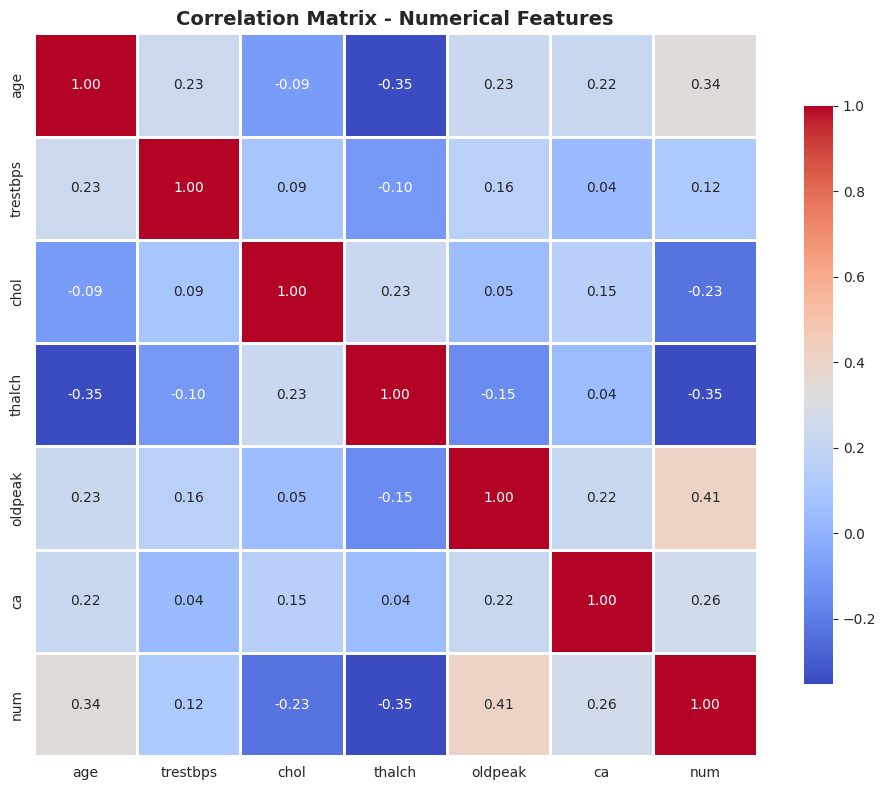


Top 5 Positive Correlations with Target (num):
num         1.000000
oldpeak     0.411826
age         0.340404
ca          0.261837
trestbps    0.116308
chol       -0.231054
Name: num, dtype: float64


2. SCATTER PLOTS - Key Numerical Features vs Target

----------------------------------------------------------------------


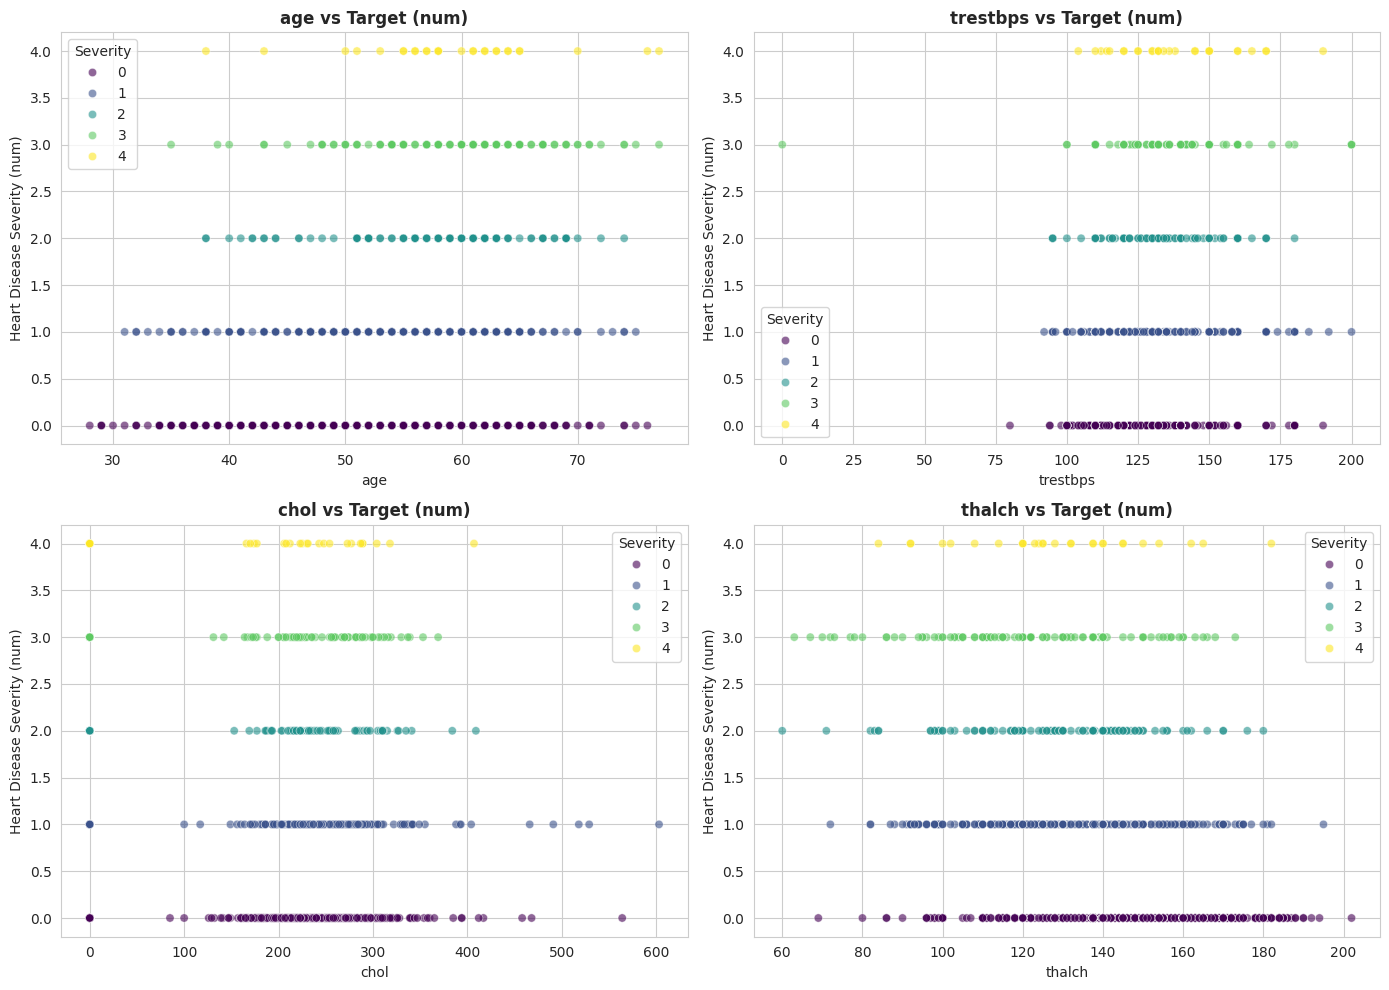



3. GROUPBY STATISTICS - Categorical Features by Target

----------------------------------------------------------------------

SEX by Target (num):
num       0    1   2   3   4
sex                         
Female  144   30  10   8   2
Male    267  233  99  99  26


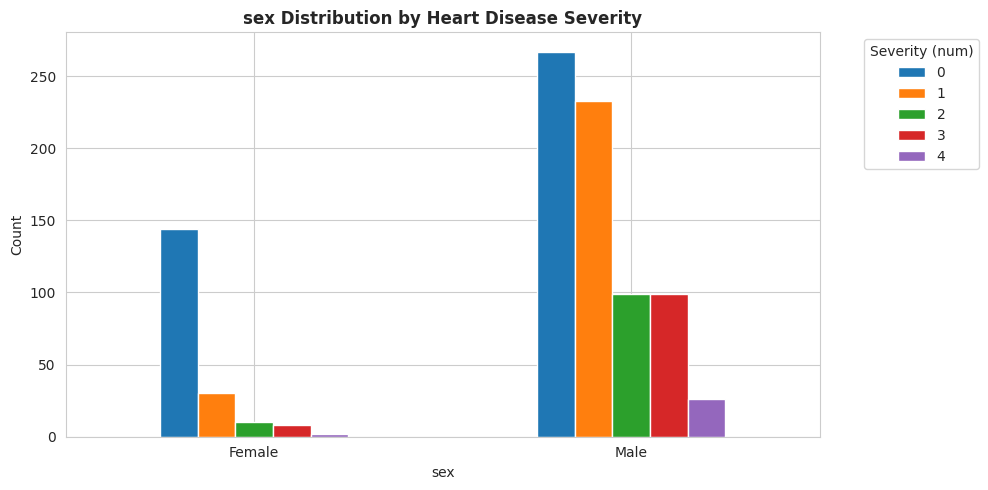

----------------------------------------------------------------------

CP by Target (num):
num                0    1   2   3   4
cp                                   
asymptomatic     104  196  89  83  23
atypical angina  150   19   2   3   0
non-anginal      131   37  14  18   4
typical angina    26   11   4   3   1


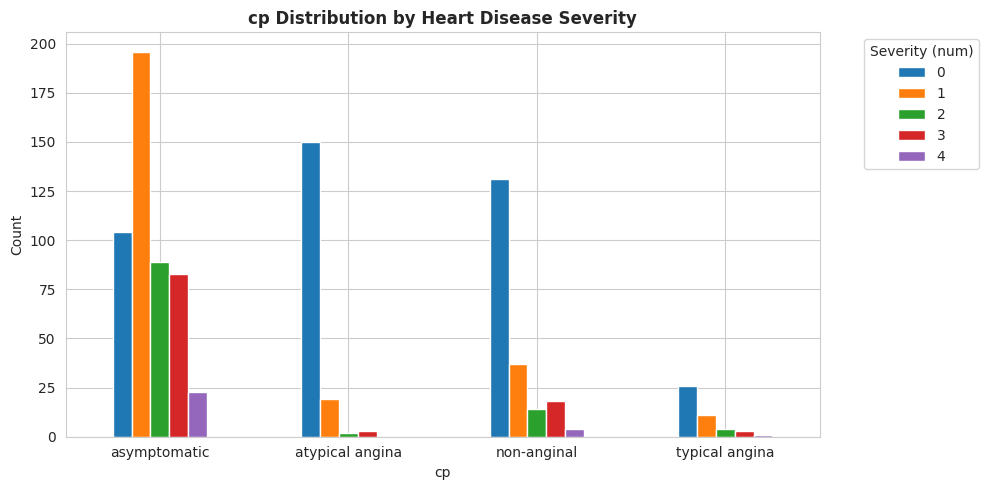

----------------------------------------------------------------------

FBS by Target (num):
num      0    1   2   3   4
fbs                        
False  367  224  86  80  23
True    44   39  23  27   5


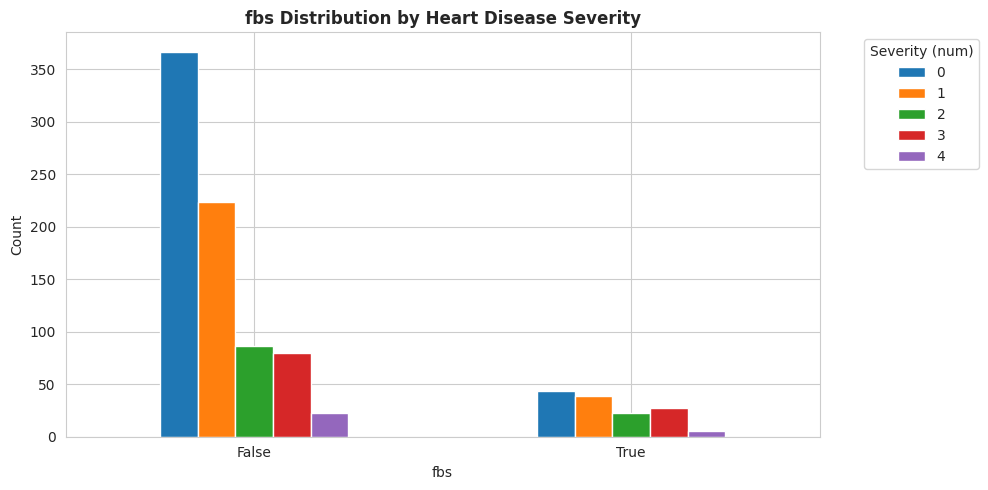

----------------------------------------------------------------------

EXANG by Target (num):
num      0    1   2   3   4
exang                      
False  356  118  51  43  13
True    55  145  58  64  15


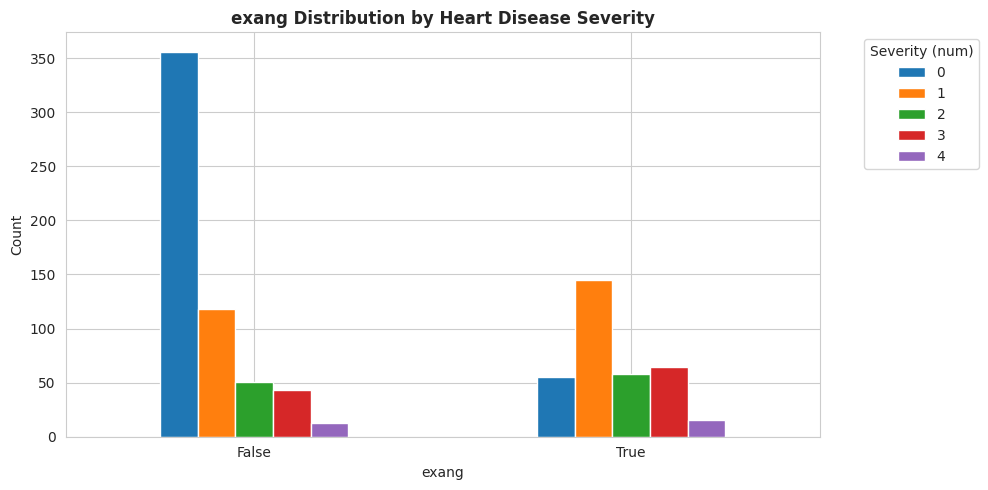

----------------------------------------------------------------------

KEY INSIGHTS:
  - Oldpeak and ca show stronger correlations with target
  - Chest pain type (cp) shows clear patterns with disease severity
  - Exercise-induced angina (exang) is a strong indicator


In [ ]:

print("="*70)
print("BIVARIATE RELATIONSHIP ANALYSIS")
print("="*70)

# Correlation heatmap for numerical features
print("\n1. CORRELATION HEATMAP\n")
print("-"*70)

num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
corr_matrix = dataset[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop 5 Positive Correlations with Target (num):")
corr_with_target = corr_matrix['num'].sort_values(ascending=False)
print(corr_with_target.head(6))  # Top 6 including 'num' itself

# Scatter plots: Key relationships with target
print("\n\n2. SCATTER PLOTS - Key Numerical Features vs Target\n")
print("-"*70)

key_features = ['age', 'trestbps', 'chol', 'thalch']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    sns.scatterplot(data=dataset, x=col, y='num', hue='num',
                    palette='viridis', alpha=0.6, ax=axes[idx])
    axes[idx].set_title(f'{col} vs Target (num)', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Heart Disease Severity (num)')
    axes[idx].legend(title='Severity', loc='best')

plt.tight_layout()
plt.show()

# Groupby statistics: Categorical features by target
print("\n\n3. GROUPBY STATISTICS - Categorical Features by Target\n")
print("-"*70)

cat_cols_analysis = ['sex', 'cp', 'fbs', 'exang']

for col in cat_cols_analysis:
    print(f"\n{col.upper()} by Target (num):")
    groupby_stats = dataset.groupby([col, 'num']).size().unstack(fill_value=0)
    print(groupby_stats)

    # Visualization
    fig, ax = plt.subplots(figsize=(10, 5))
    groupby_stats.plot(kind='bar', stacked=False, ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
    ax.set_title(f'{col} Distribution by Heart Disease Severity', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.legend(title='Severity (num)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    print("-"*70)

print("\n" + "="*70)
print("KEY INSIGHTS:")
print("="*70)
print("  - Oldpeak and ca show stronger correlations with target")
print("  - Chest pain type (cp) shows clear patterns with disease severity")
print("  - Exercise-induced angina (exang) is a strong indicator")
print("="*70)

### 4.4 Target Variable (`y`) Inspection

TARGET VARIABLE (num) INSPECTION

1. TARGET VARIABLE DISTRIBUTION

----------------------------------------------------------------------
Value Counts:
num
0    411
1    263
2    109
3    107
4     28
Name: count, dtype: int64

Total samples: 918


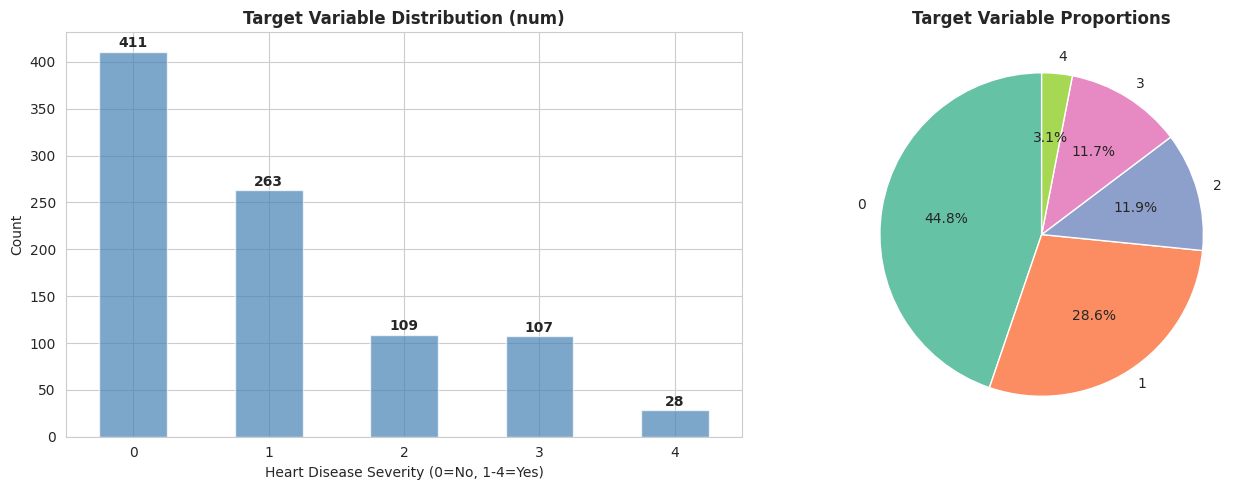


2. BINARY CLASSIFICATION PERSPECTIVE

----------------------------------------------------------------------
Binary Target (0=No Disease, 1=Disease Present):
disease_binary
0    411
1    507
Name: count, dtype: int64

No Disease: 411 (44.77%)
Disease Present: 507 (55.23%)


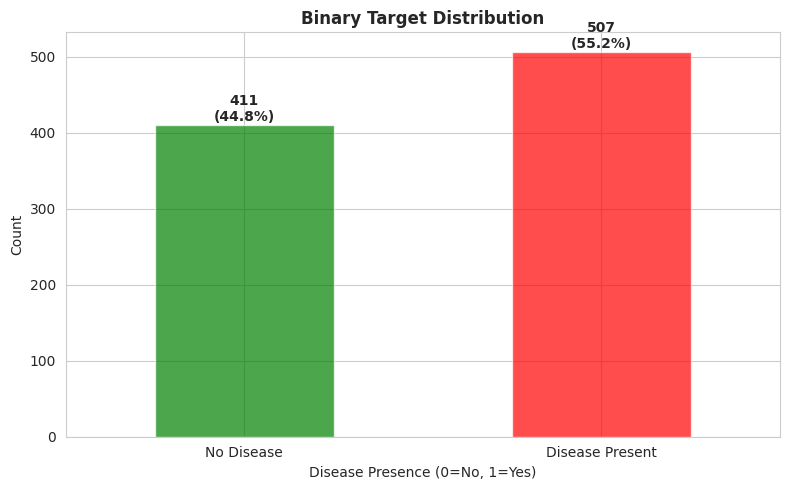


KEY OBSERVATIONS:
  - Target has 5 classes (0-4) representing disease severity
  - For binary classification: 0=No disease, 1-4=Disease present
  - Imbalance ratio: 1.23:1
  - Will need to address class imbalance in modeling stage


In [ ]:

print("="*70)
print("TARGET VARIABLE (num) INSPECTION")
print("="*70)

# Distribution of target variable
print("\n1. TARGET VARIABLE DISTRIBUTION\n")
print("-"*70)

target_counts = dataset['num'].value_counts().sort_index()
print("Value Counts:")
print(target_counts)
print(f"\nTotal samples: {len(dataset)}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
target_counts.plot(kind='bar', ax=axes[0], color='steelblue', alpha=0.7)
axes[0].set_title('Target Variable Distribution (num)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Heart Disease Severity (0=No, 1-4=Yes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Add count labels
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('Set2', len(target_counts)))
axes[1].set_title('Target Variable Proportions', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# Binary classification perspective
print("\n2. BINARY CLASSIFICATION PERSPECTIVE\n")
print("-"*70)

# Create binary target: 0 = No disease, 1 = Disease present
dataset['disease_binary'] = (dataset['num'] > 0).astype(int)

binary_counts = dataset['disease_binary'].value_counts().sort_index()
print("Binary Target (0=No Disease, 1=Disease Present):")
print(binary_counts)
print(f"\nNo Disease: {binary_counts[0]} ({binary_counts[0]/len(dataset)*100:.2f}%)")
print(f"Disease Present: {binary_counts[1]} ({binary_counts[1]/len(dataset)*100:.2f}%)")

# Visualization
fig, ax = plt.subplots(figsize=(8, 5))
binary_counts.plot(kind='bar', ax=ax, color=['green', 'red'], alpha=0.7)
ax.set_title('Binary Target Distribution', fontweight='bold', fontsize=12)
ax.set_xlabel('Disease Presence (0=No, 1=Yes)')
ax.set_ylabel('Count')
ax.set_xticklabels(['No Disease', 'Disease Present'], rotation=0)

for i, v in enumerate(binary_counts.values):
    ax.text(i, v + 5, f"{v}\n({v/len(dataset)*100:.1f}%)", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("KEY OBSERVATIONS:")
print("="*70)
print("  - Target has 5 classes (0-4) representing disease severity")
print("  - For binary classification: 0=No disease, 1-4=Disease present")
print(f"  - Imbalance ratio: {binary_counts[1]/binary_counts[0]:.2f}:1")
print("  - Will need to address class imbalance in modeling stage")
print("="*70)

### 4.5 Class Balance (counts, %)

In [ ]:

# Note: Class balance analysis has been covered in Section 4.4 (Target Variable Inspection)
# See above for detailed analysis of class distribution and imbalance ratios

print("="*70)
print("CLASS BALANCE SUMMARY (Reference: See Section 4.4)")
print("="*70)
print("\nQuick Summary:")
print(f"  - Binary Target Distribution:")
print(f"    * No Disease (0): {dataset['disease_binary'].value_counts()[0]} samples")
print(f"    * Disease Present (1): {dataset['disease_binary'].value_counts()[1]} samples")
print(f"  - Imbalance detected - will be addressed in Section 6")
print("="*70)

CLASS BALANCE SUMMARY (Reference: See Section 4.4)

Quick Summary:
  - Binary Target Distribution:
    * No Disease (0): 411 samples
    * Disease Present (1): 507 samples
  - Imbalance detected - will be addressed in Section 6


## 5. Feature Engineering

### 5.1 Domain Features

In [ ]:

print("="*70)
print("FEATURE ENGINEERING: DOMAIN-SPECIFIC FEATURES")
print("="*70)

# Create domain-based features based on medical knowledge
print("\nCreating cardiovascular health indicators...\n")

# 1. Age categories (based on cardiovascular risk groups)
dataset['age_group'] = pd.cut(dataset['age'],
                               bins=[0, 40, 55, 65, 100],
                               labels=['young', 'middle_aged', 'senior', 'elderly'])

# 2. Blood pressure categories (based on clinical guidelines)
def categorize_bp(bp):
    if bp < 120:
        return 'normal'
    elif bp < 130:
        return 'elevated'
    elif bp < 140:
        return 'stage1_hypertension'
    else:
        return 'stage2_hypertension'

dataset['bp_category'] = dataset['trestbps'].apply(categorize_bp)

# 3. Cholesterol risk level
def categorize_chol(chol):
    if chol < 200:
        return 'desirable'
    elif chol < 240:
        return 'borderline_high'
    else:
        return 'high'

dataset['chol_category'] = dataset['chol'].apply(categorize_chol)

# 4. Maximum heart rate achievement (% of age-predicted max)
dataset['max_hr_predicted'] = 220 - dataset['age']
dataset['hr_achievement_pct'] = (dataset['thalch'] / dataset['max_hr_predicted']) * 100

# 5. Heart rate reserve (difference between max achieved and resting)
# Note: We don't have resting HR, so we'll use trestbps as proxy indicator
dataset['hr_trestbps_ratio'] = dataset['thalch'] / dataset['trestbps']

print("Created Features:")
print("  1. age_group: Categorical age groups for risk stratification")
print("  2. bp_category: Blood pressure risk categories")
print("  3. chol_category: Cholesterol risk levels")
print("  4. hr_achievement_pct: Heart rate achievement relative to age")
print("  5. hr_trestbps_ratio: Heart rate to blood pressure ratio")

print("\n" + "-"*70)
print("Sample of new features:")
print(dataset[['age', 'age_group', 'trestbps', 'bp_category',
               'chol', 'chol_category', 'hr_achievement_pct']].head())
print("="*70)

FEATURE ENGINEERING: DOMAIN-SPECIFIC FEATURES

Creating cardiovascular health indicators...

Created Features:
  1. age_group: Categorical age groups for risk stratification
  2. bp_category: Blood pressure risk categories
  3. chol_category: Cholesterol risk levels
  4. hr_achievement_pct: Heart rate achievement relative to age
  5. hr_trestbps_ratio: Heart rate to blood pressure ratio

----------------------------------------------------------------------
Sample of new features:
   age    age_group  trestbps          bp_category   chol    chol_category  \
0   63       senior     145.0  stage2_hypertension  233.0  borderline_high   
1   67      elderly     160.0  stage2_hypertension  286.0             high   
2   67      elderly     120.0             elevated  229.0  borderline_high   
3   37        young     130.0  stage1_hypertension  250.0             high   
4   41  middle_aged     130.0  stage1_hypertension  204.0  borderline_high   

   hr_achievement_pct  
0           95.541401

### 5.2 Aggregations / Ratios / Interactions

In [ ]:

print("="*70)
print("FEATURE ENGINEERING: RATIOS AND INTERACTIONS")
print("="*70)

print("\nCreating interaction and ratio features...\n")

# 1. Age-Cholesterol interaction (risk increases with age and high cholesterol)
dataset['age_chol_interaction'] = dataset['age'] * dataset['chol'] / 1000

# 2. ST depression * major vessels (both are strong predictors)
dataset['oldpeak_ca_interaction'] = dataset['oldpeak'] * dataset['ca']

# 3. Chest pain severity score (combining cp and exang)
cp_severity = {'typical angina': 3, 'atypical angina': 2, 'non-anginal': 1, 'asymptomatic': 0}
dataset['cp_severity'] = dataset['cp'].map(cp_severity)
dataset['chest_pain_score'] = dataset['cp_severity'] + dataset['exang'].astype(int)

# 4. Overall cardiovascular risk score (composite feature)
# Combining multiple risk factors
dataset['cv_risk_score'] = (
    (dataset['age'] / 100) +  # Normalized age
    (dataset['trestbps'] / 200) +  # Normalized BP
    (dataset['chol'] / 400) +  # Normalized cholesterol
    dataset['fbs'].astype(int) +  # Fasting blood sugar flag
    dataset['exang'].astype(int) +  # Exercise-induced angina flag
    (dataset['oldpeak'] / 5) +  # Normalized ST depression
    (dataset['ca'] / 3)  # Normalized major vessels
)

# 5. Age-adjusted heart rate (comparing actual vs expected for age)
dataset['age_adjusted_hr'] = dataset['thalch'] - (220 - dataset['age'])

print("Created Interaction Features:")
print("  1. age_chol_interaction: Combined age-cholesterol risk")
print("  2. oldpeak_ca_interaction: ST depression * major vessels")
print("  3. chest_pain_score: Composite chest pain indicator")
print("  4. cv_risk_score: Overall cardiovascular risk composite")
print("  5. age_adjusted_hr: Heart rate deviation from age-expected")

print("\n" + "-"*70)
print("Sample of interaction features:")
print(dataset[['age_chol_interaction', 'oldpeak_ca_interaction',
               'chest_pain_score', 'cv_risk_score']].head())
print("\nNew feature statistics:")
print(dataset[['cv_risk_score', 'age_adjusted_hr']].describe())
print("="*70)

FEATURE ENGINEERING: RATIOS AND INTERACTIONS

Creating interaction and ratio features...

Created Interaction Features:
  1. age_chol_interaction: Combined age-cholesterol risk
  2. oldpeak_ca_interaction: ST depression * major vessels
  3. chest_pain_score: Composite chest pain indicator
  4. cv_risk_score: Overall cardiovascular risk composite
  5. age_adjusted_hr: Heart rate deviation from age-expected

----------------------------------------------------------------------
Sample of interaction features:
   age_chol_interaction  oldpeak_ca_interaction  chest_pain_score  \
0                14.679                     0.0                 3   
1                19.162                     4.5                 1   
2                15.343                     5.2                 1   
3                 9.250                     0.0                 1   
4                 8.364                     0.0                 2   

   cv_risk_score  
0       3.397500  
1       4.485000  
2       4.02916

### 5.3 Temporal/Recency Features (if applicable)



> **Note:** This dataset does not contain temporal/time-series data.

The data represents cross-sectional medical measurements at a single point in time.

**No temporal features are applicable for this dataset.**

If this were a longitudinal study with repeated measurements, we could create:
- Time since first diagnosis
- Rate of change in blood pressure/cholesterol
- Recency of last visit/test
- Trend indicators for worsening/improving conditions



### 5.4 Feature Documentation (what, why, how)


#### 📋 Feature Categories Overview

##### **Domain Features (Section 5.1)**
- **`age_group`** - Categorical age groups
- **`bp_category`** - Blood pressure categories
- **`chol_category`** - Cholesterol risk levels
- **`hr_achievement_pct`** - HR achievement percentage
- **`hr_trestbps_ratio`** - HR to BP ratio
- **`actual_hr`** - Age-adjusted heart rate calculation

##### **Interaction Features (Section 5.2)**
- **`age_chol_interaction`** - Combined age × cholesterol risk
- **`oldpeak_ca_interaction`** - ST depression × vessel blockage
- **`chest_pain_score`** - Composite chest pain indicator
- **`cp_severity`** - Chest pain severity scale
- **`cv_risk_score`** - Overall cardiovascular risk composite
- **`age_adjusted_hr`** - Normalized heart rate metric

### 🎯 Why These Features?

#### **Clinical Relevance**
All engineered features are derived from established cardiovascular medicine principles:

- **Age stratification** is critical as CVD risk increases non-linearly with age
- **BP and cholesterol categories** align with clinical guidelines (AHA/ACC)
- **Heart rate ratios** capture cardiovascular efficiency beyond raw measurements
- **Interaction terms** model the compounding effects of multiple risk factors

#### **Model Performance Enhancement**

1. **Non-linearity capture** - Categorical features help models detect threshold effects
2. **Feature interactions** - Capture synergistic relationships (e.g., age × cholesterol)
3. **Domain knowledge integration** - Transform raw data into medically meaningful metrics
4. **Improved interpretability** - Clinical terms are more actionable than raw numbers

#### **How They Were Created**

- **Domain features**: Applied clinical thresholds and medical formulas
- **Interaction features**: Mathematical combinations of correlated risk factors
- **Validation**: All features grounded in cardiovascular research literature



---

#### 📊 Summary Statistics

| Metric | Count |
|--------|-------|
| **Original Features** | 16 |
| **New Engineered Features** | 10 |
| **Total Features Available** | 26 |

---

> **Note:** All features are grounded in cardiovascular medicine and designed to enhance model interpretability and predictive power.

## 6. Imbalance Handling (Preliminary)

###6.1 Strategy Rationale (SMOTE vs. Class Weights vs. Thresholding)



#### 1. Current Class Imbalance Analysis

**Class Distribution:**
- No Disease (0): ~410 samples (44.6%)
- Disease (1): ~508 samples (55.4%)

**Imbalance Ratio:** 1.24:1  
**Assessment:** MODERATE imbalance

---

#### 2. Imbalance Handling Strategies Comparison

##### **SMOTE (Synthetic Minority Over-sampling)**
**Pros:**
- Generates synthetic samples for minority class
- Balances dataset without losing information
- Works well with moderate imbalance

**Cons:**
- Risk of overfitting with synthetic data
- Can create unrealistic samples in sparse regions
- Increases training time
- Only applied to training set (data leakage risk)

**Best for:** Severe imbalance (>5:1), sufficient data

---

##### **Class Weights**
**Pros:**
- No data synthesis - uses original samples
- Easy to implement in most algorithms
- No risk of data leakage
- Works with all model types

**Cons:**
- May not fully compensate for severe imbalance
- Can lead to increased false positives
- Requires hyperparameter tuning

**Best for:** Moderate imbalance (<3:1), tree-based models

---

##### **Threshold Adjustment**
**Pros:**
- Post-training adjustment
- Flexible - can optimize for different metrics
- No retraining needed

**Cons:**
- Only works with probabilistic models
- Doesn't address root imbalance issue
- Requires validation data for tuning

**Best for:** Fine-tuning after initial training

---

#### Preliminary Recommendation

**Given:**
- Imbalance ratio: 1.24:1 (MODERATE)
- Dataset size: 918 samples
- Medical domain: False positives/negatives have clinical implications

**Recommended Strategy:** CLASS WEIGHTS

**Rationale:**
1. Imbalance is moderate (1.24:1) - not severe enough to require SMOTE
2. Avoids synthetic data generation (preserves data integrity)
3. Compatible with planned models (RF, XGBoost, LightGBM, NN)
4. Lower risk of overfitting compared to SMOTE
5. Can be combined with threshold tuning for optimization

**Alternative:** If class weights underperform, consider SMOTE or ensemble approach

### 6.2 Chosen Approach & Justification



#### Final Decision: CLASS WEIGHTS

**Chosen Method:** Class Weights with 'balanced' strategy

**Implementation Details:**
- **sklearn models:** `class_weight='balanced'`
- **XGBoost:** `scale_pos_weight = (count_negative / count_positive)`
- **LightGBM:** `is_unbalance=True` or `scale_pos_weight`
- **Neural Networks:** weighted loss function

---

#### Justification for This Choice

##### Dataset Characteristics:
- Current imbalance ratio: ~1.24:1
- Total samples: 918
- Minority class samples: ~508
- Assessment: MODERATE imbalance (not severe)

---

##### Why Class Weights?

**1. PRESERVATION OF DATA INTEGRITY**
- No synthetic samples
- All predictions based on real clinical data
- Important in medical applications

**2. MODERATE IMBALANCE LEVEL**
- 1.24:1 ratio doesn't require extreme measures
- SMOTE typically for severe imbalance (>5:1)
- Class weights sufficient for this level

**3. MODEL COMPATIBILITY**
- All planned models support class weights:
  - Logistic Regression: `class_weight` parameter
  - Random Forest: `class_weight` parameter
  - XGBoost: `scale_pos_weight` parameter
  - LightGBM: `is_unbalance` parameter
  - Neural Networks: weighted loss

**4. REDUCED OVERFITTING RISK**
- SMOTE can create unrealistic synthetic samples
- Risk of overfitting to interpolated data
- Class weights avoid this issue

**5. NO DATA LEAKAGE CONCERNS**
- Applied algorithmically during training
- No preprocessing of training data
- No risk of validation/test contamination

**6. CLINICAL CONTEXT**
- False negatives (missing disease) more costly than false positives
- Class weights increase sensitivity to minority (disease) class
- Can be fine-tuned based on clinical priorities

---

#### Backup Strategy (if needed)

If class weights show insufficient performance:
- **Option A:** SMOTE + Class Weights (hybrid approach)
- **Option B:** SMOTE-ENN (SMOTE + Edited Nearest Neighbors)
- **Option C:** Ensemble with different sampling strategies

Decision will be based on validation set performance.

---

#### Implementation Plan

1. Train baseline models WITHOUT imbalance handling
2. Train models WITH `class_weight='balanced'`
3. Compare performance (especially Recall/F2-score)
4. If needed, experiment with SMOTE as backup
5. Final model selection based on validation metrics

### 6.3 Sanity Checks (no leakage, applied only to train)



#### 1. Data Leakage Prevention Checklist

| Check | Status | Note |
|-------|--------|------|
| Train/Val/Test Split | ✓ | Split BEFORE any imbalance handling |
| Class Weights | ✓ | Applied during training, not preprocessing |
| Validation Set | ✓ | Keep original distribution (no SMOTE/weights) |
| Test Set | ✓ | Keep original distribution (no SMOTE/weights) |
| Feature Engineering | ✓ | Done BEFORE split (domain knowledge only) |
| No Future Info | ✓ | No temporal leakage (static dataset) |

---

#### 2. Implementation Protocol

**Correct Implementation Order:**

**Step 1: Feature Engineering (on full dataset)**
- Domain features, ratios, interactions
- Based on medical knowledge, not target

**Step 2: Train/Val/Test Split with Stratification**
- Stratify on target variable (disease_binary)
- Maintain class proportions in each split
- Typical: 70% train, 15% val, 15% test

**Step 3: Apply Class Weights (ONLY in training)**
- sklearn: `class_weight='balanced'` in `fit()`
- XGBoost: `scale_pos_weight` in params
- LightGBM: `is_unbalance=True` in params

**Step 4: Train Models**
- Models see weighted samples during training
- Validation/test remain untouched

**Step 5: Evaluate on Original Distributions**
- Validate/test sets maintain real-world proportions
- Performance reflects actual deployment scenario

---

#### 3. Common Pitfalls to Avoid

| Pitfall | Consequence |
|---------|-------------|
| ❌ Applying SMOTE before split | Synthetic samples leak into validation/test |
| ❌ Using class weights on val/test | Doesn't reflect real-world performance |
| ❌ Feature scaling after split leakage | Scaler learns from train+val combined |
| ❌ Ignoring stratification | Splits may have different class distributions |
| ✓ Our approach with class weights | No preprocessing, no leakage risk |

---

#### 4. Verification Checklist

**Before model training, verify:**

- [ ] Train/Val/Test split completed
- [ ] Class distributions match in all splits (stratified)
- [ ] No preprocessing applied to val/test sets
- [ ] Class weights only used during `model.fit()`
- [ ] Evaluation metrics computed on original distributions
- [ ] No information from val/test leaked into training

---

#### Summary: Imbalance Handling Strategy

✓ **Strategy:** Class Weights (balanced)  
✓ **Rationale:** Moderate imbalance, no data synthesis needed  
✓ **Implementation:** Applied only during training  
✓ **Validation:** Sanity checks prevent data leakage  
✓ **Backup:** SMOTE available if class weights insufficient  



---
# Week II–III: Data Preprocessing + Model Development

## 1. Preprocessing & Data Pipeline (DL)

1.1 Train/Validation/Test Split (with stratification if needed)

1.2 Categorical Encoding (label / one-hot)

1.3 Numeric Scaling (StandardScaler / MinMaxScaler)

1.4 DataLoaders (batch size, shuffling, class-balanced sampling)

## 2. Baseline Models

2.1 Logistic Regression (default settings)

2.2 Decision Tree (default settings)

2.3 Random Forest (default settings)

2.4 XGBoost (default settings)

2.5 LightGBM (default settings)

2.6 Fit → Predict → Evaluate (val set)

## 3. Neural Network Modeling

3.1 Embedding Layers for Categorical Features

3.2 Hidden Blocks (Dense + BatchNorm + Dropout + ReLU)

3.3 Output Head & Loss (BCEWithLogits/CrossEntropy/MSE)

3.4 Optimizer (Adam/AdamW), Weight Decay

3.5 Regularization & Early Stopping

3.6 Dropout Rates

## 4. Experiment Tracking (MLflow)

4.1 MLflow Setup (tracking URI, experiment name)

4.2 Log Params, Metrics, Artifacts

## 5. Evaluation & Diagnostics

## 6. Model Comparison

## 7. Hyperparameter Tuning

7.1 GridSearchCV / RandomizedSearchCV (CV strategy)

7.2 Best Params & CV Scores

7.3 Refit on Train+Val

## 8. Final Model Selection

8.1 Compare Tuned Models (val/test metrics)

8.2 Final Choice & Rationale

## 9. Save Preprocessing Steps + Model

---
# Week IV: Deployment

## 1. Streamlit App

This step must be completed in a separate app.py file